# ***ADSORPTION USING AIIDALAB***


***Q1. Three types of calculations AiiDAlab offers for adsorption studies***

*Single-component adsorption isotherms* :
These are the fundamental calculations in adsorption studies and describe how much of a gas is taken up by a porous material at a constant temperature as the pressure increases. They provide direct information about adsorption capacity, the affinity of the material for the adsorbate, and the pressure range where uptake occurs. In AiiDAlab, these isotherms can be fitted to models such as Langmuir, BET, or Toth, allowing one to extract useful parameters that summarize adsorption behavior.

*Mixture adsorption via IAST (Ideal Adsorbed Solution Theory)*: 
Real-world separations typically involve mixtures of gases rather than pure components. IAST is a predictive framework that uses single-component isotherms as input to estimate how different gases will compete for adsorption sites. With this method, AiiDAlab can calculate mixture uptake and separation selectivity without the need for costly multicomponent simulations or experiments. This makes it especially useful for applications like CO₂ capture from flue gas or natural gas purification.

*Isosteric heat of adsorption*: 
This thermodynamic property measures the energy released when a gas molecule adsorbs into a porous material. AiiDAlab evaluates it by comparing isotherms collected at multiple temperatures and applying relations such as Clausius–Clapeyron. The isosteric heat reflects the strength of interaction between gas and material, and it highlights how this strength changes with loading. This information is crucial for balancing high uptake with energy-efficient regeneration in processes such as carbon capture.

***Q2. Physical properties of IRMOF-1***
job PK : 5 
Density : 0.576983 g/cm^3
ASA A^2 : 3964.65 A^2
POAV (A3) : 13737.4 A^3 - This is the total pore volume in the structure.
Porosity : 0.77498 - (porosity) tells you the relative amount compared to the total material volume. (POAV volume fraction)


***Q3. Henry coefficients***

CO2 : JOB PK 330
CH4 : JOB PK 357 (isotherm results) => 0.000001

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

df_ch4 = pd.read_csv("CH4_isotherm.csv")
df_co2 = pd.read_csv("CO2_isotherm.csv")

In [4]:
from ast import literal_eval
literal_eval(df_ch4[df_ch4["Key"] == "isotherm"]["Value"].values[0])

{'pressure': [0.2,
  0.8,
  1.4,
  2.0,
  2.6,
  3.2,
  3.8,
  4.4,
  5.0,
  5.6,
  6.2,
  6.8,
  7.4,
  8.0,
  8.6,
  9.2,
  9.8,
  10.2],
 'pressure_unit': 'bar',
 'loading_absolute_dev': [0.0029644173362308,
  0.0036073513971751,
  0.01247461666375,
  0.0093074988525394,
  0.0085622977366119,
  0.023895132469734,
  0.016959060064576,
  0.020934018043423,
  0.017291472604812,
  0.023487359754016,
  0.040978839566246,
  0.056831706665629,
  0.069041712798778,
  0.04537466095581,
  0.021995637585498,
  0.043480179236672,
  0.022131904608891,
  0.036257387256277],
 'loading_absolute_unit': 'mol/kg',
 'loading_absolute_average': [0.02162393471304,
  0.08821656248548,
  0.15938723048996,
  0.21740820846624,
  0.28500735572232,
  0.36017163329092,
  0.42072514416152,
  0.49069448245972,
  0.55968976964472,
  0.62254853481656,
  0.69024508718396,
  0.7656041749752,
  0.81278071722452,
  0.91573791988976,
  0.96541452666296,
  1.008435117496,
  1.0930476908626,
  1.1446399314918],
 'enthalpy

In [5]:
import pandas as pd
from ast import literal_eval

# Extraire le dictionnaire
iso_dict = literal_eval(df_ch4[df_ch4["Key"] == "isotherm"]["Value"].values[0])

# Construire un DataFrame avec seulement pression et chargement
df_iso_ch4 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val * 1000 for val in iso_dict["loading_absolute_average"]]  # conversion mol/kg → mmol/g
})

print(df_iso_ch4.head())


   Pressure(bar)  Loading(mmol/g)
0            0.2        21.623935
1            0.8        88.216562
2            1.4       159.387230
3            2.0       217.408208
4            2.6       285.007356


In [33]:
import pandas as pd
from ast import literal_eval

# Extraire le dictionnaire
iso_dict = literal_eval(df_co2[df_co2["Key"] == "isotherm"]["Value"].values[0])

# Construire un DataFrame avec seulement pression et chargement
df_iso_co2 = pd.DataFrame({
    "Pressure(bar)": iso_dict["pressure"],
    "Loading(mmol/g)": [val * 1000 for val in iso_dict["loading_absolute_average"]]  # conversion mol/kg → mmol/g
})

print(df_iso_co2.head())

   Pressure(bar)  Loading(mmol/g)
0            0.2       102.794861
1            0.8       396.211524
2            1.4       708.200096
3            2.0      1043.533426
4            2.6      1401.529678


In [4]:
df_co2.head()

,Key,Value
0,Density,0.576983
1,Density_unit,g/cm^3
2,Estimated_saturation_loading,26.78196
3,Estimated_saturation_loading_unit,mol/kg
4,Input_block,"[1.525, 100]"


In [8]:
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading(mmol/g)",
                                    isotherm="Pressure(bar)")

TypeError: InterpolatorIsotherm.__init__() got an unexpected keyword argument 'isotherm'

In [6]:
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)")

KeyError: 'Pressure(bar)'

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

# Load the data (assuming your CSV files are available)
#df_ch4 = pd.read_csv("CH4_IRMOF1.csv")
#df_co2 = pd.read_csv("CO2_IRMOF1.csv")

# Alternative: Try using Langmuir model fit for better extrapolation
# This often works better for IAST calculations
try:
    # Fit Langmuir model to CH4 data
    ch4_langmuir = pyiast.ModelIsotherm(df_ch4,
                                        loading_key="Loading(mmol/g)",
                                        pressure_key="Pressure(bar)",
                                        model="Langmuir")
    
    # Fit Langmuir model to CO2 data  
    co2_langmuir = pyiast.ModelIsotherm(df_co2,
                                        loading_key="Loading(mmol/g)",
                                        pressure_key="Pressure(bar)",
                                        model="Langmuir")
    
    print("Using Langmuir model fits for better extrapolation")
    ch4_isotherm = ch4_langmuir
    co2_isotherm = co2_langmuir
    
except Exception as e:
    print("Langmuir fit failed, using InterpolatorIsotherm with extrapolation")
    # Create isotherms using InterpolatorIsotherm with extrapolation enabled
    ch4_isotherm = pyiast.InterpolatorIsotherm(df_iso_ch4,
                                        loading_key="Loading(mmol/g)",
                                        pressure_key="Pressure(bar)",
                                        fill_value=df_ch4["Loading(mmol/g)"].iloc[-1])

    co2_isotherm = pyiast.InterpolatorIsotherm(df_iso_co2,
                                        loading_key="Loading(mmol/g)",
                                        pressure_key="Pressure(bar)",
                                        fill_value=df_co2["Loading(mmol/g)"].iloc[-1])

# First, let's check the pressure ranges of our data
print("CH4 pressure range:", df_ch4['Pressure(bar)'].min(), "to", df_ch4['Pressure(bar)'].max(), "bar")
print("CO2 pressure range:", df_co2['Pressure(bar)'].min(), "to", df_co2['Pressure(bar)'].max(), "bar")

# Show all pressure points to debug
print("\nAll CH4 pressures:", sorted(df_iso_ch4['Pressure(bar)'].tolist()))
print("All CO2 pressures:", sorted(df_iso_co2['Pressure(bar)'].tolist()))

# Use exactly the pressure range requested: 0.1 to 4.0 with 0.2 increments
pressures = np.arange(0.1, 4.1, 0.2)
print(f"Requested pressure range: 0.1 to 4.0 bar")
print(f"Generated pressure points: {len(pressures)} points from {pressures[0]:.1f} to {pressures[-1]:.1f}")

# Define molar fractions (0.5 for both components in binary mixture)
y_ch4 = 0.5  # Molar fraction of CH4 in gas phase
y_co2 = 0.5  # Molar fraction of CO2 in gas phase

# Initialize arrays to store results
ch4_loadings = []
co2_loadings = []
successful_pressures = []

# Calculate binary mixture isotherms using IAST
for P_total in pressures:
    try:
        # Calculate partial pressures
        P_ch4 = y_ch4 * P_total  # 0.5 * P_total
        P_co2 = y_co2 * P_total  # 0.5 * P_total
        
        print(f"Trying P_total = {P_total:.1f} bar (P_CH4 = {P_ch4:.1f}, P_CO2 = {P_co2:.1f})")
        
        # Try the IAST calculation - let pyIAST handle extrapolation if needed
        # Calculate mixture loadings using IAST
        partial_pressures = [P_ch4, P_co2]
        isotherms = [ch4_isotherm, co2_isotherm]
        
        # Use pyiast.iast to calculate mixture loadings
        q_mix = pyiast.iast(partial_pressures, isotherms, verboseflag=False)
        
        ch4_loadings.append(q_mix[0])  # CH4 loading
        co2_loadings.append(q_mix[1])  # CO2 loading
        successful_pressures.append(P_total)
        print(f"  ✓ Success: CH4 = {q_mix[0]:.3f}, CO2 = {q_mix[1]:.3f}")
            
    except Exception as e:
        print(f"  ✗ Error at pressure {P_total:.1f} bar: {str(e)[:150]}...")
        continue

# Update pressures to only include successful calculations
pressures = np.array(successful_pressures)

# Convert to numpy arrays for easier handling
ch4_loadings = np.array(ch4_loadings)
co2_loadings = np.array(co2_loadings)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pressures, ch4_loadings, 'b-', marker='o', linewidth=2, markersize=6, label='CH₄')
plt.plot(pressures, co2_loadings, 'r-', marker='s', linewidth=2, markersize=6, label='CO₂')

plt.xlabel('Total Pressure (bar)', fontsize=12)
plt.ylabel('Loading (mmol/g)', fontsize=12)
plt.title('Binary Mixture Isotherms (CH₄/CO₂) in IRMOF-1\nMolar fractions: y_CH₄ = y_CO₂ = 0.5', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 4.2)
plt.ylim(0, max(max(ch4_loadings), max(co2_loadings)) * 1.1)

# Add some styling
plt.tight_layout()
plt.show()

# Print some results for verification
print("\nBinary Mixture Isotherm Results:")
print("="*50)
print(f"{'Pressure (bar)':<15} {'CH4 Loading':<15} {'CO2 Loading':<15}")
print("="*50)
for i in range(0, len(pressures), max(1, len(pressures)//8)):  # Print ~8 points
    print(f"{pressures[i]:<15.1f} {ch4_loadings[i]:<15.3f} {co2_loadings[i]:<15.3f}")
print("="*50)
print(f"Total data points calculated: {len(pressures)}")

Langmuir fit failed, using InterpolatorIsotherm with extrapolation


KeyError: 'Loading(mmol/g)'

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

# Load the data (assuming your CSV files are available)
#df_ch4 = pd.read_csv("CH4_IRMOF1.csv")
#df_co2 = pd.read_csv("CO2_IRMOF1.csv")

# Create isotherms using InterpolatorIsotherm
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)")

co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="Loading(mmol/g)",
                                    pressure_key="Pressure(bar)")

# First, let's check the pressure ranges of our data
print("CH4 pressure range:", df_iso_ch4['Pressure(bar)'].min(), "to", df_ch4['Pressure(bar)'].max(), "bar")
print("CO2 pressure range:", df_iso_co2['Pressure(bar)'].min(), "to", df_co2['Pressure(bar)'].max(), "bar")

# Use a more conservative pressure range based on your data
# Start with a smaller range that's well within your data bounds
max_safe_pressure = min(df_iso_ch4['Pressure(bar)'].max(), df_co2['Pressure(bar)'].max()) * 0.8
pressures = np.arange(0.1, 4.1, 0.2)
print(f"Using pressure range: 0.1 to {pressures[-1]:.1f} bar")

# Define molar fractions (0.5 for both components in binary mixture)
y_ch4 = 0.5 # Molar fraction of CH4 in gas phase
y_co2 = 0.5 # Molar fraction of CO2 in gas phase

# Initialize arrays to store results
ch4_loadings = []
co2_loadings = []
successful_pressures = []

# Calculate binary mixture isotherms using IAST
for P_total in pressures:
    try:
        # Partial pressures
        P_ch4 = y_ch4 * P_total
        P_co2 = y_co2 * P_total
        
        # Check if partial pressures are within data range
        if P_ch4 <= df_ch4['Pressure(bar)'].max() and P_co2 <= df_iso_co2['Pressure(bar)'].max():
            # Calculate mixture loadings using IAST
            partial_pressures = [P_ch4, P_co2]
            isotherms = [ch4_isotherm, co2_isotherm]
            
            # Use pyiast.iast to calculate mixture loadings
            q_mix = pyiast.iast(partial_pressures, isotherms, verboseflag=False)
            
            ch4_loadings.append(q_mix[0])  # CH4 loading
            co2_loadings.append(q_mix[1])  # CO2 loading
            successful_pressures.append(P_total)
        else:
            print(f"Skipping pressure {P_total:.1f} bar - outside data range")
            
    except Exception as e:
        print(f"Error at pressure {P_total:.1f} bar: {str(e)[:100]}...")
        continue

# Update pressures to only include successful calculations
pressures = np.array(successful_pressures)

# Convert to numpy arrays for easier handling
ch4_loadings = np.array(ch4_loadings)
co2_loadings = np.array(co2_loadings)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pressures, ch4_loadings, 'b-', marker='o', linewidth=2, markersize=6, label='CH₄')
plt.plot(pressures, co2_loadings, 'r-', marker='s', linewidth=2, markersize=6, label='CO₂')

plt.xlabel('Total Pressure (bar)', fontsize=12)
plt.ylabel('Loading (mmol/g)', fontsize=12)
plt.title('Binary Mixture Isotherms (CH₄/CO₂) in IRMOF-1\nMolar fractions: y_CH₄ = y_CO₂ = ####', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 4.2)
plt.ylim(0, max(max(ch4_loadings), max(co2_loadings)) * 1.1)

# Add some styling
plt.tight_layout()
plt.show()

# Print some results for verification
print("\nBinary Mixture Isotherm Results:")
print("="*50)
print(f"{'Pressure (bar)':<15} {'CH4 Loading':<15} {'CO2 Loading':<15}")
print("="*50)
for i in range(0, len(pressures), max(1, len(pressures)//8)):  # Print ~8 points
    print(f"{pressures[i]:<15.1f} {ch4_loadings[i]:<15.3f} {co2_loadings[i]:<15.3f}")
print("="*50)
print(f"Total data points calculated: {len(pressures)}")

KeyError: 'Pressure(bar)'

In [ ]:
print("\n" + "="*60)
print("SELECTIVITY CALCULATIONS")
print("="*60)

# Define specific pressures for selectivity calculation
selectivity_pressures = [0.1, 1.0, 2.0, 3.0]

print("Selectivity formula: S_CO2/CH4 = (x_CO2/x_CH4) / (y_CO2/y_CH4)")
print("Where x = mole fraction in adsorbed phase, y = mole fraction in gas phase")
print("Since y_CO2 = y_CH4 = 0.5, then S = x_CO2/x_CH4")
print()

selectivities = []
for P_target in selectivity_pressures:
    # Interpolate loadings at the exact target pressure
    q_CH4 = np.interp(P_target, pressures, ch4_loadings)
    q_CO2 = np.interp(P_target, pressures, co2_loadings)
    
    # Calculate total loading and mole fractions in adsorbed phase
    q_total = q_CH4 + q_CO2
    x_CH4 = q_CH4 / q_total
    x_CO2 = q_CO2 / q_total
    
    # Calculate selectivity
    selectivity = x_CO2 / x_CH4
    selectivities.append(selectivity)
    
    print(f"At P = {P_target:.1f} bar:")
    print(f"  CH4 loading: {q_CH4:.3f} mmol/g")
    print(f"  CO2 loading: {q_CO2:.3f} mmol/g")
    print(f"  x_CH4 (adsorbed): {x_CH4:.3f}")
    print(f"  x_CO2 (adsorbed): {x_CO2:.3f}")
    print(f"  Selectivity S_CO2/CH4: {selectivity:.2f}")
    print()

# Analysis of selectivity trend
print("SELECTIVITY ANALYSIS:")
print("="*30)
print(f"{'Pressure (bar)':<15} {'Selectivity':<12}")
print("-" * 27)
for P, S in zip(selectivity_pressures, selectivities):
    print(f"{P:<15.1f} {S:<12.2f}")

print(f"\nSelectivity trend: {selectivities[0]:.2f} → {selectivities[-1]:.2f}")
if selectivities[-1] < selectivities[0]:
    print("✓ Selectivity DECREASES with pressure")
    print("This indicates that at higher pressures, CH4 competes more effectively")
    print("for adsorption sites, reducing the preferential adsorption of CO2.")
elif selectivities[-1] > selectivities[0]:
    print("✓ Selectivity INCREASES with pressure")
    print("CO2 maintains its adsorption advantage even at higher pressures.")
else:
    print("✓ Selectivity remains relatively CONSTANT with pressure")

print(f"\nConclusion: CO2 is preferentially adsorbed over CH4 by a factor of")
print(f"{min(selectivities):.1f}-{max(selectivities):.1f}x across the pressure range studied.")


***Q7.***   
For both components CO₂ and CH₄ at total pressure (P) and temperature (T), the adsorption **selectivity** of CO₂ over CH₄ is given by  

$$
S_{CO_2/CH_4} \;=\; \frac{x_{CO_2}/y_{CO_2}}{x_{CH_4}/y_{CH_4}}
\;=\; \frac{q_{CO_2}}{q_{CH_4}} \cdot \frac{y_{CH_4}}{y_{CO_2}}
$$  

where $q_i$ are the binary loadings (e.g., mmol·g⁻¹),  
$x_i = \dfrac{q_i}{q_{CO_2}+q_{CH_4}}$ are the adsorbed-phase mole fractions,  
and $y_i$ are the gas-phase mole fractions.


**So why doesn't $S_{CO_2/CH_4}$ change when $y_{CO_2}$ changes?**  
Under the Ideal Adsorbed Solution Theory (IAST), for fixed $T$ and $P$, the ratio of adsorbed amounts  $\tfrac{q_{CO_2}}{q_{CH_4}}$ scales in proportion to the gas-phase ratio $\tfrac{y_{CO_2}}{y_{CH_4}}$.  Substituting into the selectivity definition,  

$$
S_{CO_2/CH_4} \;=\; \left(\frac{q_{CO_2}}{q_{CH_4}}\right)\left(\frac{y_{CH_4}}{y_{CO_2}}\right)
$$  

leads to cancellation of the composition dependence. Therefore, $S_{CO_2/CH_4}$ is invariant to the feed composition (at that temperature and pressure).


In order to show that the selectivity is invariant to the composition, we will recompute binary loadings with $y_{CO_2}=0.2,\,y_{CH_4}=0.8$ and show that $S_{CO_2/CH_4}$ matches the values obtained at $y_{CO_2}=y_{CH_4}=0.5$ at the same pressures.


CO2   pressure range: 0.20–10.20 bar | points=18
CH4   pressure range: 0.20–10.20 bar | points=18

Selectivity S_CO2/CH4 at specified pressures (composition invariance check):


,Pressure (bar),Selectivity y_CO2=0.2,Selectivity y_CO2=0.5,|Δ|
0,0.1,4.753754,4.747234,0.006519
1,1.0,4.608422,4.586046,0.022376
2,2.0,4.560717,4.530914,0.029803
3,3.0,4.532239,4.541587,0.009348


Max |difference| across reported points: 0.0298


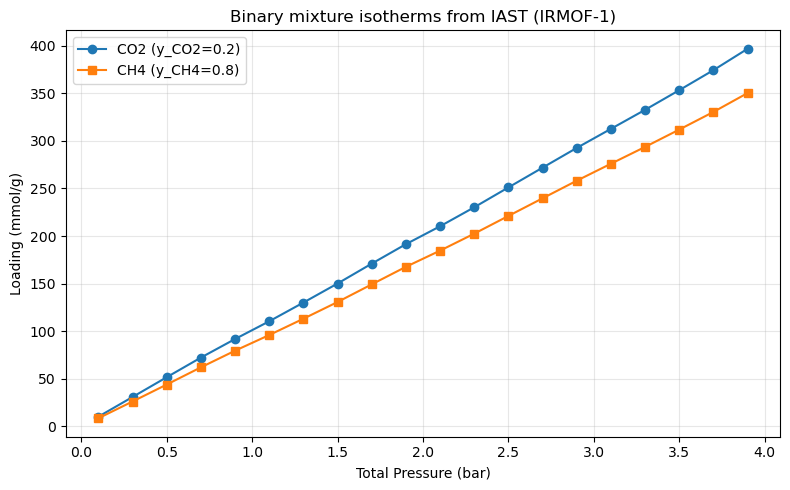

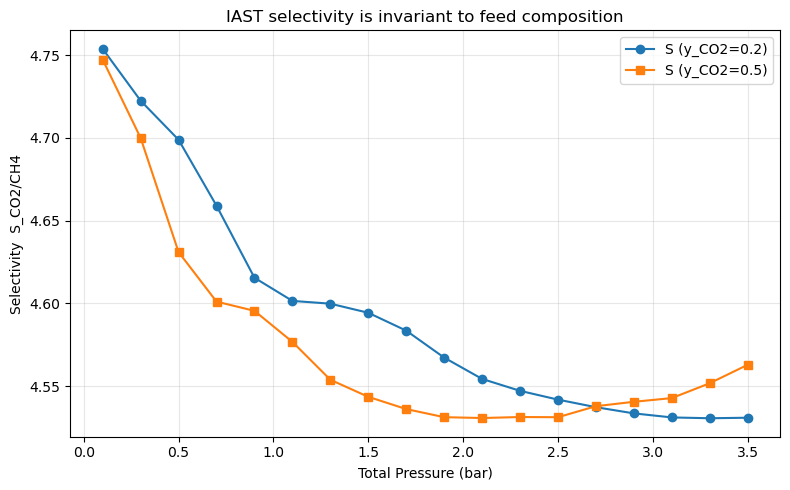

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyiast
from ast import literal_eval

CO2_CSV = "CO2_isotherm.csv"
CH4_CSV = "CH4_isotherm.csv"
report_pressures = [0.1, 1.0, 2.0, 3.0]    
grid_pressures   = np.round(np.arange(0.1, 4.0 + 1e-9, 0.2), 1)  

def load_isotherm_from_keyvalue_csv(path):
    """
    Read a CSV with columns ['Key','Value'] produced by AiiDA Lab.
    Extract the 'isotherm' dict -> returns tidy DataFrame with columns:
    P (bar), q (mmol/g)
    """
    raw = pd.read_csv(path)
    if not set(["Key", "Value"]).issubset(raw.columns):
        raise ValueError(f"{path}: expected columns ['Key','Value'], got {list(raw.columns)}")
    if "isotherm" not in raw["Key"].values:
        raise ValueError(f"{path}: no row with Key=='isotherm' found.")

    iso_dict = literal_eval(raw.loc[raw["Key"] == "isotherm", "Value"].values[0])

    pressures = np.asarray(iso_dict["pressure"], dtype=float)

    # Convert loading_absolute_average from mol/kg to mmol/g (1 mol/kg = 1 mmol/g)
    load_mol_per_kg = np.asarray(iso_dict["loading_absolute_average"], dtype=float)
    load_mmol_per_g = load_mol_per_kg * 1000.0

    df = pd.DataFrame({"P": pressures, "q": load_mmol_per_g}).dropna().sort_values("P")
    # keep only positive pressures and non-negative loadings
    df = df[(df["P"] > 0) & (df["q"] >= 0)].reset_index(drop=True)
    return df

# 1) Read & parse your CSVs into tidy isotherm tables
df_co2 = load_isotherm_from_keyvalue_csv(CO2_CSV)
df_ch4 = load_isotherm_from_keyvalue_csv(CH4_CSV)

print(f"CO2   pressure range: {df_co2['P'].min():.2f}–{df_co2['P'].max():.2f} bar | points={len(df_co2)}")
print(f"CH4   pressure range: {df_ch4['P'].min():.2f}–{df_ch4['P'].max():.2f} bar | points={len(df_ch4)}")

# 2) Build pyIAST isotherm objects from these tables
co2_iso = pyiast.InterpolatorIsotherm(df_co2, loading_key="q", pressure_key="P")
ch4_iso = pyiast.InterpolatorIsotherm(df_ch4, loading_key="q", pressure_key="P")

def mixture_isotherm_and_selectivity(co2_iso, ch4_iso, y_co2, y_ch4, P_targets):
    """Compute mixture loadings and selectivity S_CO2/CH4 for given gas composition and pressures."""
    P_ok, qCO2, qCH4 = [], [], []
    for Ptot in P_targets:
        p_co2, p_ch4 = y_co2 * Ptot, y_ch4 * Ptot
        try:
            q_mix = pyiast.iast([p_co2, p_ch4], [co2_iso, ch4_iso], verboseflag=False)
            qCO2.append(q_mix[0]); qCH4.append(q_mix[1]); P_ok.append(Ptot)
        except Exception:
            # Skip pressures outside safe interpolation region
            pass
    P_ok = np.asarray(P_ok)
    qCO2 = np.asarray(qCO2)
    qCH4 = np.asarray(qCH4)
    S = (qCO2 / qCH4) * (y_ch4 / y_co2)
    return P_ok, qCO2, qCH4, S

# 3) Compute for y_CO2 = 0.2 and for y_CO2 = 0.5 (baseline)
P02, qCO2_02, qCH4_02, S02 = mixture_isotherm_and_selectivity(co2_iso, ch4_iso, 0.2, 0.8, grid_pressures)
P05, qCO2_05, qCH4_05, S05 = mixture_isotherm_and_selectivity(co2_iso, ch4_iso, 0.5, 0.5, grid_pressures)

# 4) Build a comparison table at the required pressures
def interp_at(Pt, P_arr, Y_arr):
    return np.interp(Pt, P_arr, Y_arr) if (len(P_arr) and P_arr.min() <= Pt <= P_arr.max()) else np.nan

rows = []
for Pt in report_pressures:
    s02 = interp_at(Pt, P02, S02)
    s05 = interp_at(Pt, P05, S05)
    rows.append([Pt, s02, s05, None if (np.isnan(s02) or np.isnan(s05)) else abs(s02 - s05)])

out = pd.DataFrame(rows, columns=["Pressure (bar)", "Selectivity  y_CO2=0.2", "Selectivity  y_CO2=0.5", "|Δ|"])
print("\nSelectivity S_CO2/CH4 at specified pressures (composition invariance check):")
display(out)

if out["|Δ|"].notna().any():
    print(f"Max |difference| across reported points: {np.nanmax(out['|Δ|']):.3g}")

# 5) Plot mixture isotherms for y_CO2 = 0.2
plt.figure(figsize=(8,5))
plt.plot(P02, qCO2_02, marker='o', label='CO2 (y_CO2=0.2)')
plt.plot(P02, qCH4_02, marker='s', label='CH4 (y_CH4=0.8)')
plt.xlabel('Total Pressure (bar)'); plt.ylabel('Loading (mmol/g)')
plt.title('Binary mixture isotherms from IAST (IRMOF-1)')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# 6) Plot selectivity curves for y=0.2 and y=0.5 on common grid
common_min = max(P02.min() if len(P02) else 1e9, P05.min() if len(P05) else 1e9)
common_max = min(P02.max() if len(P02) else -1e9, P05.max() if len(P05) else -1e9)
if common_min < common_max:
    P_common = np.round(np.arange(common_min, common_max + 1e-9, 0.2), 1)
    S02_c = np.interp(P_common, P02, S02)
    S05_c = np.interp(P_common, P05, S05)
    plt.figure(figsize=(8,5))
    plt.plot(P_common, S02_c, marker='o', label='S (y_CO2=0.2)')
    plt.plot(P_common, S05_c, marker='s', label='S (y_CO2=0.5)')
    plt.xlabel('Total Pressure (bar)'); plt.ylabel('Selectivity  S_CO2/CH4')
    plt.title('IAST selectivity is invariant to feed composition')
    plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()
else:
    print("Not enough overlapping pressure points to plot selectivity comparison.")


**Temperature dependence:**  
Selectivity *does* depend on **temperature** because adsorption is exothermic.  To test this, one needs pure isotherms at a different T (e.g., 280 K, 320 K),  apply IAST again, and compare selectivity values across temperatures.